In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
%run cleandata.py

import re
import math
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model
from sklearn import isotonic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

/Users/jbrosamer/PonyPricer
opening /Users/jbrosamer/PonyPricer/BatchArea/AllGreatLakesUSAAds.p
N Rows /Users/jbrosamer/PonyPricer/BatchArea/AllGreatLakesUSAAds.p 32226
Total rows 32226 Line  66
Total rows 32226 Line  170
Total rows 32226 Line  119
Total rows 5258 Line  121
Total rows 4848 Line  123
Total rows 4842 Line  126
Total rows 4842 Line  133
Skills 4H
Skills 5-Panel DNA Test N-N
Skills Advanced Rider Recommended
Skills Agility
Skills All Around
Skills Baroque Horse
Skills Barrel Racing
Skills Beginner-Safe Horse
Skills Breeders Trust
Skills Bridle Horse
Skills Broodmare
Skills Broodmare Only
Skills Calf Roping
Skills Champion
Skills Champion Pedigree
Skills Color Tested
Skills Companion Only
Skills Country English Pleasure
Skills Cowboy Mounted Shooting
Skills Cowboy Racing
Skills Cowhorse
Skills Cutting
Skills Double Registered
Skills Double Registered AQHA-APHA
Skills Draft
Skills Dressage
Skills Drill Team
Skills Driving
Skills Endurance Riding
Skills English Pleasure
Skill

/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from model import *
df_test = all_data()
df = df_test.copy()
df = clean_col(df)



df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere',
       ...
       u'Two-Rein Horse', u'Vaulting', u'Weanling', u'Western Dressage',
       u'Western Pleasure', u'Western Riding', u'Wife-Safe Horse',
       u'Working Equitation', u'Yearling', u'Youth'],
      dtype='object', length=184)


Score 0.407717260305
Score 0.38385429156
Abs Median Error: 1788.24933151
Abs Percent Error: 0.408963692738
Mean RMSE: 6060.77006932
R2 0.395785775933
Line fit m:0.450883 b:4.635340


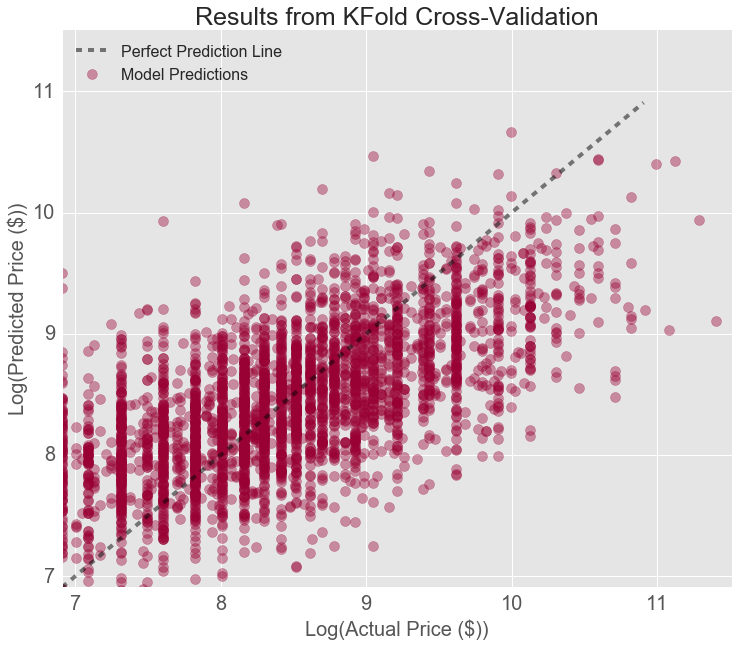

In [3]:
df = encode(df)
b = Model(df)
b.split()
b.kfold_cv(n_folds=2)
b.plot_results()
#df=b.cross_val_cols()

Feature ranking:
breed 1. feature 4 (0.139165)
age 2. feature 0 (0.137200)
inches 3. feature 2 (0.095203)
color 4. feature 3 (0.055961)
Dressage 5. feature 39 (0.018251)
Broodmare 6. feature 24 (0.017553)
Jumping 7. feature 79 (0.015228)
registered 8. feature 5 (0.014908)
event 9. feature 9 (0.013987)
compet 10. feature 12 (0.013107)
All Around 11. feature 18 (0.012502)
dressage 12. feature 6 (0.012483)
Western Riding 13. feature 166 (0.012244)
video 14. feature 13 (0.012187)
prospect 15. feature 10 (0.012086)
hunt 16. feature 7 (0.011928)
Western Pleasure 17. feature 165 (0.011064)
Polo 18. feature 107 (0.010498)
Superior Award 19. feature 146 (0.009304)
Trail Riding, Recreational 20. feature 156 (0.008844)
English Pleasure 21. feature 43 (0.007851)
Reining 22. feature 120 (0.007764)
import 23. feature 11 (0.007473)
Champion 24. feature 27 (0.007429)
NRHA Futurity-Derby Nominated 25. feature 94 (0.007401)
Bridle Horse 26. feature 23 (0.007211)
Broodmare Only 27. feature 25 (0.007114)


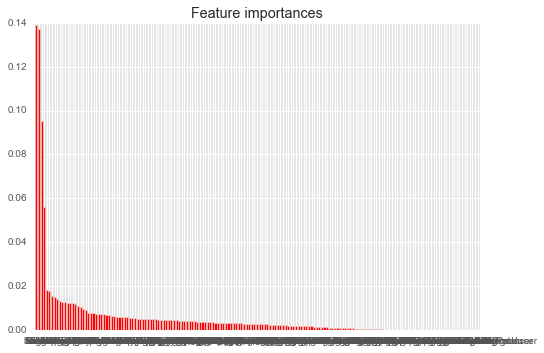

In [4]:
from model import *
gbr=b.makeModel()
b.plotFeatures()

features [ 4  0  2  3 39 24 79  5]
FeatureNames ['age', 'gender', 'inches', 'color', 'breed', 'registered', 'dressage', 'hunt', 'jump', 'event', 'prospect', 'import', 'compet', 'video', '4H', '5-Panel DNA Test N-N', 'Advanced Rider Recommended', 'Agility', 'All Around', 'Baroque Horse', 'Barrel Racing', 'Beginner-Safe Horse', 'Breeders Trust', 'Bridle Horse', 'Broodmare', 'Broodmare Only', 'Calf Roping', 'Champion', 'Champion Pedigree', 'Color Tested', 'Companion Only', 'Country English Pleasure', 'Cowboy Mounted Shooting', 'Cowboy Racing', 'Cowhorse', 'Cutting', 'Double Registered', 'Double Registered AQHA-APHA', 'Draft', 'Dressage', 'Drill Team', 'Driving', 'Endurance Riding', 'English Pleasure', 'Eventing', 'Field Trials', 'Foundation Bred', 'Foxhunter', 'Futurity Eligible', 'GBED N-G', 'GBED N-N', 'Guard Donkey', 'Gun-Safe Hunting Horse', 'Gymkhana', 'Hackamore Horse', 'Halter', 'Harness', 'Harness Racing', 'Hazing', 'HERDA N-Hrd', 'HERDA N-N', 'Heterozygous', 'High-Percentage Colo

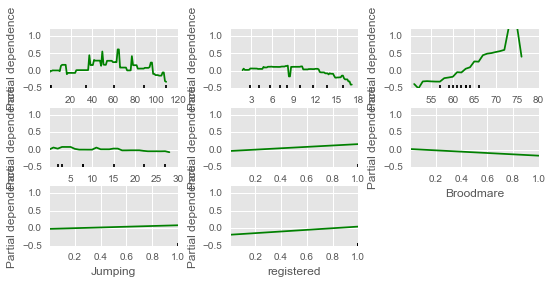

In [5]:
b.plotPartial(8)


In [6]:

features=final_cols[:-1]
medians=list()
means=list()
pf=predCVDataframe()
gpDict=dict()
for f in features:
    gpBy=pf.groupby(pf[f])['perDiff'].median().sort_values(ascending=False)
    gpDict[f]=gpBy

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere',
       ...
       u'Two-Rein Horse', u'Vaulting', u'Weanling', u'Western Dressage',
       u'Western Pleasure', u'Western Riding', u'Wife-Safe Horse',
       u'Working Equitation', u'Yearling', u'Youth'],
      dtype='object', length=184)


In [7]:
gpDict['breedGroup']

KeyError: 'breedGroup'

In [ ]:
plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>100000,:].index
#df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'lnprice']]
plot = sns.pairplot(df_temp, hue = 'gender', diag_kind='kde')